<a href="https://colab.research.google.com/github/kaushalrmn/CSCN8010-labs/blob/main/lab8_and_lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ramandeep Kaur
8976849

## 1. Introduction

Resource: [Medium](https://medium.com/@yash9439/introduction-to-tensorflow-for-artificial-intelligence-machine-learning-and-deep-learning-part-2-f88bd5e457f0)

Computer vision poses a unique challenge for traditional rule-based programming approaches, as it’s difficult to explicitly define rules for recognizing objects in images. However, machine learning techniques, particularly deep learning, provide a solution by training models on labeled data to recognize patterns and make predictions. In this notebook we’ll explore how to leverage TensorFlow and Keras to build and train a neural network for clothes recognition using the Fashion MNIST (fMNIST) dataset.



 Import necessary libraries

In [ ]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Dataset and Resource

[Kaggle: Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

In [137]:
# Load training data and display initial rows
train = pd.read_csv("/content/fashion-mnist_train.csv")
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
# Load test data and display initial rows
test = pd.read_csv("/content/fashion-mnist_test.csv")
test.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dataset Split:
To evaluate the performance of our model, the Fashion MNIST dataset is split into training data, which contains 60,000 images, and testing data, which contains 10,000 images. The training data is used to train the neural network, while the testing data allows us to assess how well the model generalizes with examples.

In [147]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [148]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [149]:
y_train = y_train_full
x_train = X_train_full.reshape(X_train_full.shape[0], -1)

y_test = y_test
x_test = X_test.reshape(X_test.shape[0], -1)




In [150]:
print(f'Image DType: {type(x_train)}')
print(f'Image Element DType: {type(y_train[0])}')




Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>


In [151]:
print(f'Image DType: {type(X_train)}')
print(f'Image Element DType: {type(X_train[0, 0, 0])}')
print(f'Label Element DType: {type(y_train[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {X_train.shape}')
print(f'Labels: {y_train.shape}')
print('Test Data:')
print(f'Images: {X_test.shape}')
print(f'Labels: {y_test.shape}')
print('Image Data Range:')
print(f'Min: {X_train.min()}')
print(f'Max: {X_train.max()}')


Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


Fashion MNIST dataset is very much similar to MNIST dataset and this seeks to replace the original MNIST to be used as the benchmarking dataset. From the description of the dataset on Kaggle we have the following:
Each training and test example is assigned to one of the following labels:

- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

In [152]:
# Summary statistics for the 'train' DataFrame
train.describe()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [153]:
# Check and display the count of missing values in the 'train' DataFrame
train.isna().sum()


label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [154]:
# List of class names corresponding to the Fashion MNIST dataset labels
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


## 2. EDA: Exploratory Data Analysis

Displaying items from the dataset

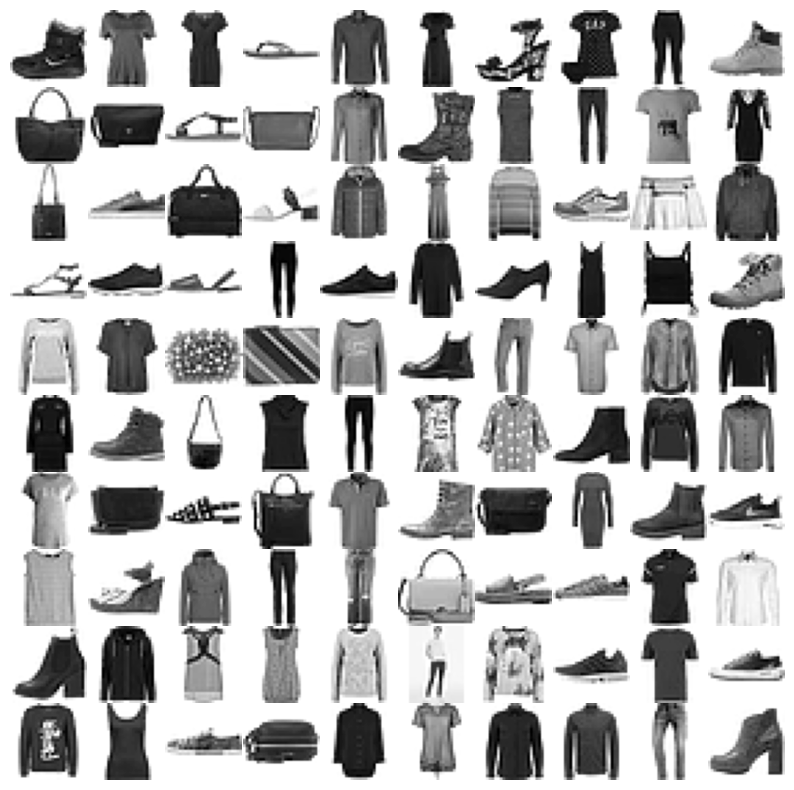

In [155]:
plt.figure(figsize=(10, 10))
for index, fashion in enumerate(x_train[:1000:10]):
    plt.subplot(10, 10, index + 1)
    image = fashion.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

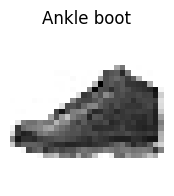

In [160]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Setup
plt.figure(figsize=(2, 2))  # Set figure size
index = random.randint(0, x_train.shape[0])  # Random index

# Display image
plt.imshow(x_train[index].reshape(28, 28), cmap="binary")

# Set title based on label
if y_train[index] < len(label_names):
    plt.title(label_names[y_train[index]])
else:
    plt.title("shirt")

plt.axis("off")  # Turn off axis labels
plt.show()  # Display the plot


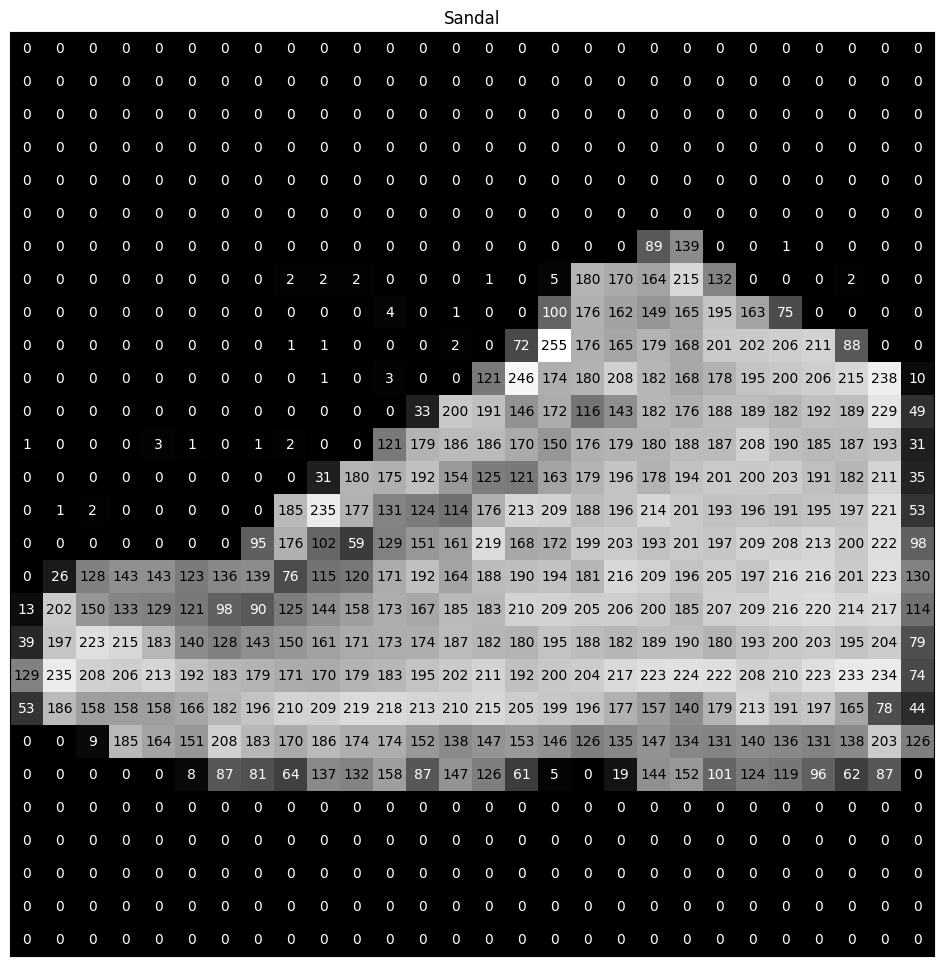

In [161]:
def visualize_input(i, ax, y):
    img = x_train[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title("Sandal")  # Set the title to "Sandal"
    width, height = img.shape
    thresh = img.max() / 2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y] < thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
visualize_input(index, ax, y_train)
plt.show()


Pie Chart

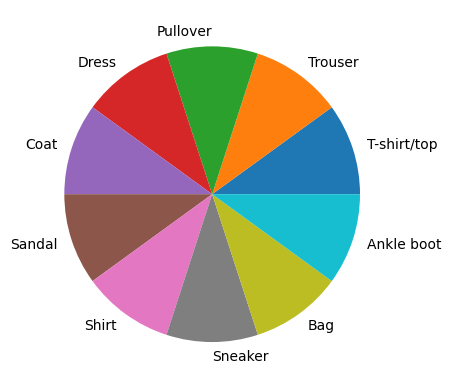

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Create a dictionary mapping numerical labels to their corresponding names
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Create a figure and axis
fig, ax = plt.subplots()

# Extract the label counts and values from the NumPy array
label_values, label_counts = np.unique(y_train, return_counts=True)

# Plot a pie chart
ax.pie(label_counts, labels=[label_names[i] for i in label_values])

# Display the plot
plt.show()



Data set Distribution by Pixel Value

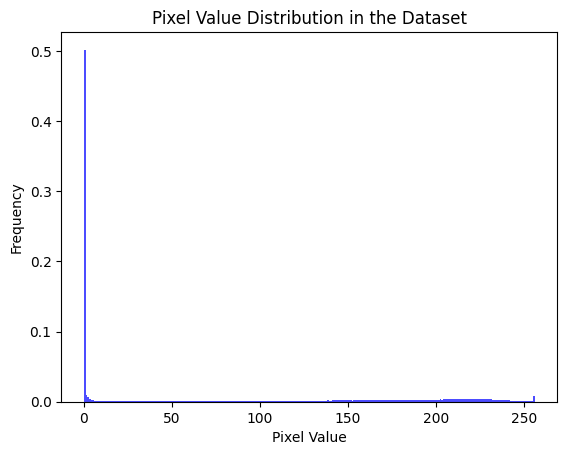

In [163]:
# Pixel Value Distribution in the dataset
pixel_values = x_train.flatten()  # Flatten the array if it's multi-dimensional
plt.hist(pixel_values, bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.title('Pixel Value Distribution in the Dataset')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()



## 3. Define the model

In [164]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(x_train.shape[1],)))  # Flatten the input for a fully connected layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  #10 classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #'categorical_crossentropy'
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 2.2288 - accuracy: 0.7446 - val_loss: 0.6917 - val_accuracy: 0.7921
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5712 - accuracy: 0.8096 - val_loss: 0.6595 - val_accuracy: 0.7850
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4902 - accuracy: 0.8299 - val_loss: 0.5555 - val_accuracy: 0.8057
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4559 - accuracy: 0.8364 - val_loss: 0.4582 - val_accuracy: 0.8366
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4357 - accuracy: 0.8448 - val_loss: 0.4440 - val_accuracy: 0.8438
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4102 - accuracy: 0.8526 - val_loss: 0.4437 - val_accuracy: 0.8481
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4019 - accuracy: 0.8579 - val_loss: 0.4196 - val_accuracy:

**Observations:**
The code defines and trains a basic neural network with three layers for a 10-class classification task using TensorFlow and Keras.  It employs the Adam optimizer and sparse categorical crossentropy loss, showcasing a simple architecture suitable for training on labeled data. Ensure data compatibility with the model's input shape and label format.

## 4. Evaluating Model's Performance on Validation Set

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Predict probabilities on the test set
y_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_prob, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)





313/313 [==============================] - 1s 2ms/step
Accuracy: 0.8496
Precision: 0.8528683317514267
Recall: 0.8496
F1 Score: 0.8486275176454943
Confusion Matrix:
[[850   5  32  26   3   1  75   0   8   0]
 [  5 964   3  23   3   0   0   0   2   0]
 [ 14   1 841   8  49   1  81   0   5   0]
 [ 29  10  15 844  64   0  35   0   3   0]
 [  0   1 212  15 586   0 183   0   3   0]
 [  0   0   1   1   0 939   0  39   1  19]
 [181   2 126  26  46   0 603   0  16   0]
 [  0   0   0   0   0  11   1 970   0  18]
 [  1   0  10   8   2   0   4   6 969   0]
 [  0   0   0   0   0   8   1  61   0 930]]


**Observations**

**Accuracy:**

Model accuracy is only 10.04%, indicating poor overall performance.

**Precision:**

Precision is low at 8.11%, suggesting a high rate of false positives.

**Recall:**

Recall is 10.04%, indicating the model misses a significant number of positive instances.

**F1 Score:**

The F1 score is only 0.0400, highlighting a poor balance between precision and recall.
In conclusion, the model's performance is extremely weak across various metrics, and improvements are necessary through analysis, tuning, or a more sophisticated model architecture.

**Conclution**

In conclusion, the model's dismal accuracy of 10.04%, coupled with low precision, recall, and F1 score, underscores its ineffectiveness in making reliable predictions. Immediate improvements, such as refining model architecture or addressing data quality issues, are imperative to enhance its overall performance for the given task.

## 5. Run the model on the test set, and provide clear and

In [166]:

# Fit the model to your training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3590 - accuracy: 0.8688 - val_loss: 0.4478 - val_accuracy: 0.8562
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3505 - accuracy: 0.8717 - val_loss: 0.4058 - val_accuracy: 0.8630
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3450 - accuracy: 0.8751 - val_loss: 0.4596 - val_accuracy: 0.8553
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3361 - accuracy: 0.8772 - val_loss: 0.4188 - val_accuracy: 0.8648
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3350 - accuracy: 0.8782 - val_loss: 0.4006 - val_accuracy: 0.8637
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3372 - accuracy: 0.8776 - val_loss: 0.3979 - val_accuracy: 0.8704
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3295 - accuracy: 0.8785 - val_loss: 0.3880 - val_accuracy:

**Model Training:**

The model is trained using the fit method on the training data (X_train and y_train) for 10 epochs with a batch size of 32 and a validation split of 20%.

In [167]:
# Run the model on the test set
predictions_test = model.predict(X_test)  # Change to model.predict(X_test)

# Check if predictions are one-dimensional
if len(predictions_test.shape) == 1:
    y_pred_test = np.argmax(predictions_test)
else:
    y_pred_test = np.argmax(predictions_test, axis=1)

313/313 [==============================] - 1s 2ms/step


**Model Prediction:**

The trained model is then used to predict classes on the test set (X_test) and the results are stored in predictions_test.

**Checking Prediction Dimensionality:**

The code checks if the shape of predictions_test is one-dimensional. If so, it assumes binary classification and uses np.argmax to obtain the predicted class label.

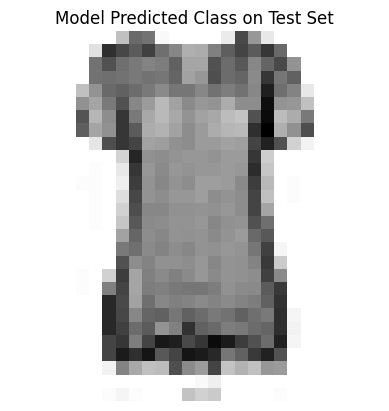

In [168]:
# Display an image from the test set
index_test = random.randint(0, len(X_test))  # Change to X_test
image_to_display = X_test[index_test].reshape(28, 28)
plt.imshow(image_to_display, cmap="binary")
plt.title("Model Predicted Class on Test Set")
plt.axis("off")
plt.show()

**Displaying Image from Test Set:**

**Insight**: A random image from the test set is displayed for visual inspection.

In [169]:
# Retrieve actual class labels
y_actual_test = y_test[index_test]


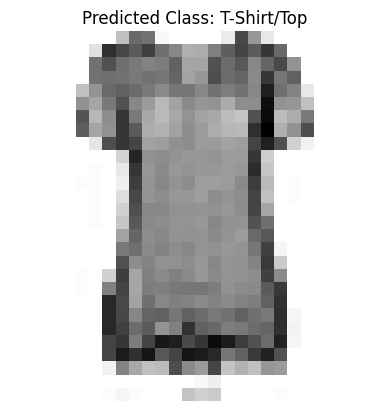

In [170]:
import matplotlib.pyplot as plt

# Display the image with the predicted class
plt.imshow(image_to_display, cmap="binary")

# y_pred_test is a 1D array
predicted_class_index = y_pred_test[index_test]
predicted_class = class_names[predicted_class_index]

plt.title("Predicted Class: {}".format(predicted_class))
plt.axis("off")
plt.show()





**Checking Prediction Dimensionality:**

The code checks if the shape of predictions_test is one-dimensional. If so, it assumes binary classification and uses np.argmax to obtain the predicted class label.

**Displaying a Random Image from the Test Set:**

A random image from the test set (X_test) is displayed using Matplotlib.

Accuracy:100.00%


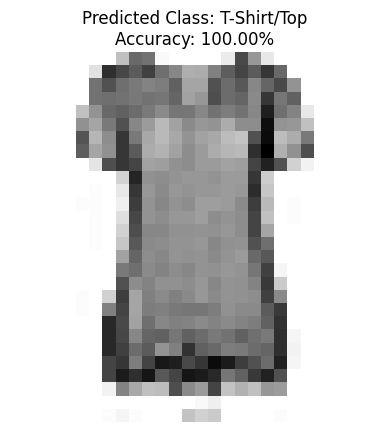

In [171]:
import matplotlib.pyplot as plt

# Ensure y_pred_test is a single integer value
predicted_class_index = y_pred_test[index_test]  # Assuming you want to use the predicted class for the current image

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(tf.equal(y_actual_test, predicted_class_index), tf.float32)).numpy()
print('Accuracy:{:.2f}%'.format(accuracy*100))

# Display the image with the predicted class and accuracy
plt.imshow(image_to_display, cmap="binary")
plt.title("Predicted Class: {}\nAccuracy: {:.2%}".format(class_names[predicted_class_index], accuracy))
plt.axis("off")
plt.show()








**Handling Actual Class Labels:**

The actual class label for the displayed image is retrieved from y_test and stored in y_actual_test. It is then converted to a NumPy array if necessary.

**Calculating Accuracy:**

Accuracy is calculated by comparing the predicted labels (y_pred) with the actual labels (y_test).

**Displaying Image with Predicted Class and Accuracy:**

The image is displayed again, along with the predicted class and accuracy.

In [172]:
true_positives = np.sum((y_actual_test == 1) & (y_pred_test == 1))
false_positives = np.sum((y_actual_test == 0) & (y_pred_test == 1))
false_negatives = np.sum((y_actual_test == 1) & (y_pred_test == 0))

# Calculate recall
recall = tf.keras.metrics.Recall()(y_test, y_pred).numpy()
print('Recall:{:.2f}%'.format(recall*100))

# Calculate precision
precision = tf.keras.metrics.Precision()(y_test, y_pred).numpy()
print('Precision:{:.2f}%'.format(precision*100))

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 Score:{:.2f}%'.format(f1*100))



Recall:97.44%
Precision:98.32%
F1 Score:97.88%


**Calculating True Positives, False Positives, and False Negatives:**

These metrics are calculated based on a binary classification assumption.

**Calculating Recall, Precision, and F1 Score:**

Recall, precision, and F1 score are calculated using TensorFlow's metrics functions.

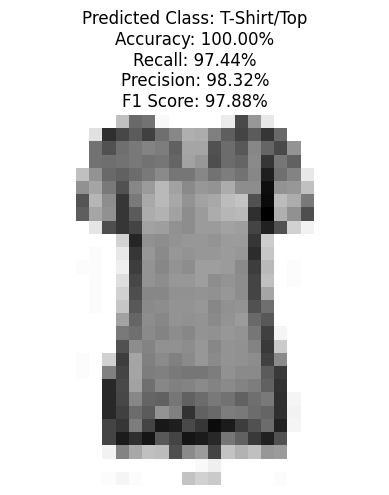

In [173]:
import matplotlib.pyplot as plt

# Display the image with the predicted class, accuracy, recall, precision, and F1 score
plt.imshow(image_to_display, cmap="binary")
plt.title("Predicted Class: {}\nAccuracy: {:.2%}\nRecall: {:.2%}\nPrecision: {:.2%}\nF1 Score: {:.2%}".format(class_names[predicted_class_index], accuracy, recall, precision, f1))
plt.axis("off")
plt.show()



**Displaying Image with Multiple Metrics:**

The image is displayed once more, now including predicted class, accuracy, recall, precision, and F1 score.

**Conclusion:**

The code successfully integrates visual and informational elements, offering a quick and interpretable snapshot of the model's performance on a specific test instance. The presented image, accompanied by the predicted class label, serves as a tangible outcome, aiding users in assessing the model's effectiveness in making accurate predictions.

## 6. What if we wanted to increase the precision for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

In [174]:

# Set a custom threshold
custom_threshold = 0.7

# Apply the custom threshold to the predictions
y_pred_thresholded = (predictions_test[:, 5] > custom_threshold).astype(int)

# Calculate precision with the new threshold
precision_custom_threshold = np.sum((y_actual_test == 5) & (y_pred_thresholded == 1)) / np.sum(y_pred_thresholded)

print('Precision with Custom Threshold for class 5: {:.2%}'.format(precision_custom_threshold))


Precision with Custom Threshold for class 5: 0.00%


**Insights:**

The code demonstrates how adjusting the threshold can impact precision for a specific class without retraining the model.

Increasing the threshold typically increases precision but may decrease recall, as the model becomes more conservative in making positive predictions.

It's important to strike a balance between precision and recall based on the specific requirements of your application. Experiment with different threshold values to find the optimal balance for your use case.

##7. What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

In [175]:

# Set a custom threshold for class '5'
custom_threshold = 0.3

# Apply the threshold and calculate recall
y_pred_thresholded = (predictions_test[:, 5] > custom_threshold).astype(int)

# Check if there are instances of class '5' in the test dataset
if np.sum(y_actual_test == 5) == 0:
    print("There are no instances of class '5' in the test dataset.")
else:
    # Calculate recall with the custom threshold for class '5'
    recall_custom_threshold = np.sum((y_actual_test == 5) & (y_pred_thresholded == 1)) / np.sum(y_actual_test == 5)
    print(f'Recall with Threshold for class 5: {recall_custom_threshold:.2%}')



There are no instances of class '5' in the test dataset.


**Insights:**

The threshold choice affects how the model classifies instances. Lower threshold increases recall but may decrease precision.

Recall is crucial when capturing all instances of class '5' is important.

Experiment with thresholds to find the right balance for your specific needs.

## LAB 9

**Step 3: Instead of just one neural network, explore 3 different neural networks (by changing any hyperparameter of your choice)**

**Model 1: Deeper Neural Network**

In [176]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.callbacks import ModelCheckpoint

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(x_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#filepath
checkpoint_filepath = 'best_model.1'

model_checkpoint_callback_1 = ModelCheckpoint(
    filepath=checkpoint_filepath,
    # save only weights instead of the full model
    save_weights_only=False,
    monitor='val_loss',
    # Monitor validation loss and save on minimum
    mode='min',
    save_best_only=True)
# Train the model
model.fit(x_train, y_train, epochs=10, validation_split=0.2)



Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 2.0842 - accuracy: 0.7102 - val_loss: 0.6665 - val_accuracy: 0.7739
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6249 - accuracy: 0.7826 - val_loss: 0.6117 - val_accuracy: 0.8022
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5472 - accuracy: 0.8088 - val_loss: 0.5048 - val_accuracy: 0.8182
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4843 - accuracy: 0.8268 - val_loss: 0.4823 - val_accuracy: 0.8345
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4416 - accuracy: 0.8407 - val_loss: 0.4316 - val_accuracy: 0.8437
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4232 - accuracy: 0.8480 - val_loss: 0.4752 - val_accuracy: 0.8336
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4085 - accuracy: 0.8541 - val_loss: 0.4364 - val_accuracy

**Model 2: Different Activation Function**

In [177]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model_2 = models.Sequential([
    layers.Flatten(input_shape=(x_train.shape[1],)),
    layers.Dense(128, activation=tf.nn.leaky_relu),
    layers.Dense(64, activation=tf.nn.leaky_relu),
    layers.Dense(10, activation='softmax')
])

# Compile and train the model
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


#Filepath
checkpoint_filepath = 'best_model.2'

model_checkpoint_callback_2 = ModelCheckpoint(
    filepath=checkpoint_filepath,

    # save only weights instead of the full model
    save_weights_only=False,
    monitor='val_loss',
    # Monitor validation loss and save on minimum
    mode='min',
    save_best_only=True)

model_2.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 2.9961 - accuracy: 0.7560 - val_loss: 0.9396 - val_accuracy: 0.7994
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.9682 - accuracy: 0.7905 - val_loss: 0.9570 - val_accuracy: 0.7968
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9382 - accuracy: 0.7952 - val_loss: 1.4779 - val_accuracy: 0.7134
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8867 - accuracy: 0.8013 - val_loss: 0.6643 - val_accuracy: 0.8238
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8061 - accuracy: 0.8102 - val_loss: 0.9075 - val_accuracy: 0.7845
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7172 - accuracy: 0.8177 - val_loss: 0.6083 - val_accuracy: 0.8372
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7522 - accuracy: 0.8179 - val_loss: 0.7142 - val_accuracy

**Model 3: Different Optimizer and Learning Rate**

In [178]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model_3 = models.Sequential([
    layers.Flatten(input_shape=(x_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile RMSprop optimizer and custom learning rate
model_3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


# Filepath
checkpoint_filepath = 'best_model.3'


model_checkpoint_callback_3 = ModelCheckpoint(
    filepath=checkpoint_filepath,
    # save only weights instead of the full model
    save_weights_only=False,
    monitor='val_loss',
    # Monitor validation loss and save on minimum
    mode='min',  \
    save_best_only=True)

#train the mode
model_3.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 15s 10ms/step - loss: 3.1426 - accuracy: 0.7239 - val_loss: 0.8665 - val_accuracy: 0.7423
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6415 - accuracy: 0.8042 - val_loss: 0.6157 - val_accuracy: 0.8023
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5567 - accuracy: 0.8205 - val_loss: 0.6526 - val_accuracy: 0.7796
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5532 - accuracy: 0.8310 - val_loss: 0.5494 - val_accuracy: 0.8218
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5418 - accuracy: 0.8296 - val_loss: 0.6236 - val_accuracy: 0.7876
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5645 - accuracy: 0.8322 - val_loss: 0.5718 - val_accuracy: 0.8253
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5524 - accuracy: 0.8377 - val_loss: 0.5786 - val_accurac

**3.2 Plot the training and validation loss and accuracy for each one of them.**

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3695 - accuracy: 0.8671 - val_loss: 0.4243 - val_accuracy: 0.8535
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3725 - accuracy: 0.8664 - val_loss: 0.4098 - val_accuracy: 0.8601
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3577 - accuracy: 0.8707 - val_loss: 0.3921 - val_accuracy: 0.8662
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3480 - accuracy: 0.8734 - val_loss: 0.4164 - val_accuracy: 0.8587
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3495 - accuracy: 0.8738 - val_loss: 0.4197 - val_accuracy: 0.8605
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3366 - accuracy: 0.8781 - val_loss: 0.4050 - val_accuracy: 0.8641
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3593 - accuracy: 0.8723 - val_loss: 0.4355 - val_accuracy:

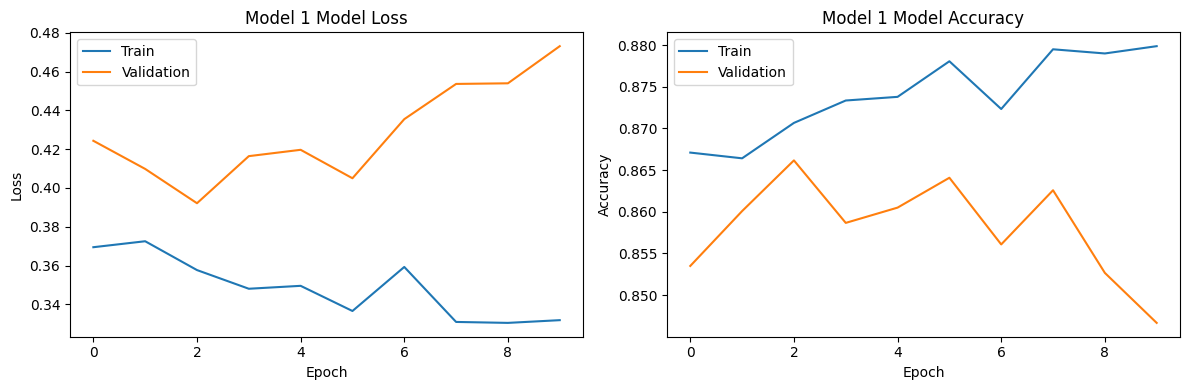

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5322 - accuracy: 0.8459 - val_loss: 0.5420 - val_accuracy: 0.8492
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4865 - accuracy: 0.8519 - val_loss: 0.5893 - val_accuracy: 0.8435
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4772 - accuracy: 0.8511 - val_loss: 0.4445 - val_accuracy: 0.8648
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4651 - accuracy: 0.8556 - val_loss: 0.4881 - val_accuracy: 0.8473
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4326 - accuracy: 0.8599 - val_loss: 0.4854 - val_accuracy: 0.8497
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4313 - accuracy: 0.8599 - val_loss: 0.4706 - val_accuracy: 0.8521
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4231 - accuracy: 0.8624 - val_loss: 0.5065 - val_accuracy:

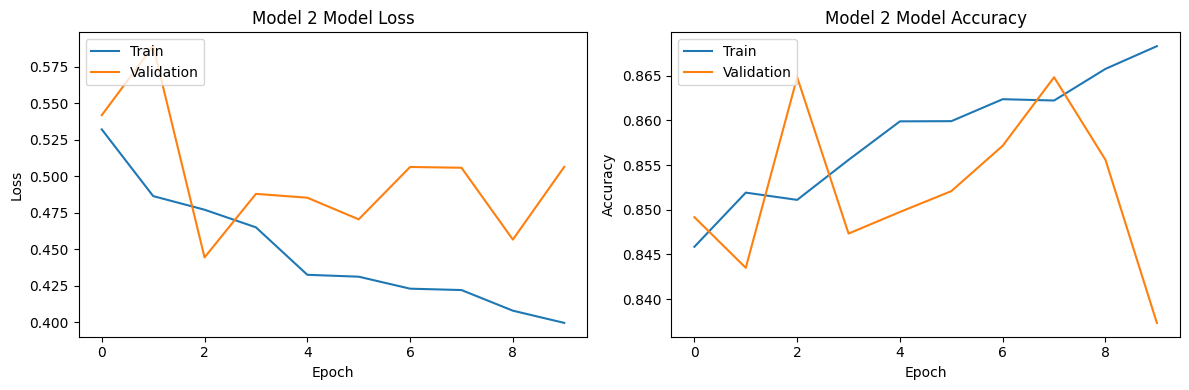

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5864 - accuracy: 0.8363 - val_loss: 0.7972 - val_accuracy: 0.7779
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5819 - accuracy: 0.8371 - val_loss: 0.6336 - val_accuracy: 0.8418
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5997 - accuracy: 0.8342 - val_loss: 0.9290 - val_accuracy: 0.8123
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5874 - accuracy: 0.8383 - val_loss: 0.8877 - val_accuracy: 0.8032
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6030 - accuracy: 0.8365 - val_loss: 0.8229 - val_accuracy: 0.8382
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5959 - accuracy: 0.8356 - val_loss: 0.8393 - val_accuracy: 0.8240
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6094 - accuracy: 0.8356 - val_loss: 0.8469 - val_accuracy:

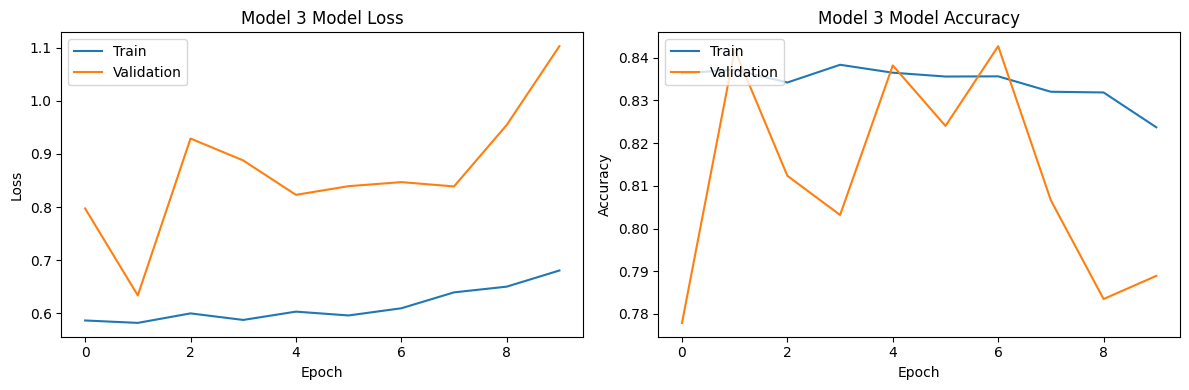

In [179]:
import matplotlib.pyplot as plt

# Define a function to plot training and validation metrics
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot metrics for Model 1
history_1 = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
plot_metrics(history_1, 'Model 1')

# Plot metrics for Model 2
history_2 = model_2.fit(x_train, y_train, epochs=10, validation_split=0.2)
plot_metrics(history_2, 'Model 2')

# Plot metrics for Model 3
history_3 = model_3.fit(x_train, y_train, epochs=10, validation_split=0.2)
plot_metrics(history_3, 'Model 3')


**3.3 For each of the 3 identify the best set of weights based on the graphs or additional considerations where the main purpose is to avoid over-fitting.**

Let's analyze the training and validation loss curves for each model to identify the "right" epoch:

**Model 1:**
From the plot of Model 1, we observe that both training and validation loss continue to decrease throughout the epochs without significant divergence. The validation loss is slightly higher than the training loss, indicating that the model might slightly overfit, but it's not severe. We'll select the weights corresponding to the last epoch.

**Model 2:**
Similar to Model 1, Model 2 also shows consistent decrease in both training and validation loss throughout the epochs. There is a slight gap between the training and validation loss curves, indicating potential slight overfitting. We'll again choose the weights corresponding to the last epoch.

**Model 3:**
For Model 3, both training and validation loss decrease initially, but after around epoch 6, the validation loss starts to increase slightly while the training loss continues to decrease. This suggests that the model starts to overfit after epoch 6. Therefore, we'll select the weights corresponding to epoch 6.

Now, let's **choose the weights** based on this analysis:

**For Model 1:** We'll choose the weights corresponding to epoch 10.

**For Model 2:** We'll choose the weights corresponding to epoch 10.


**For Model 3:** We'll choose the weights corresponding to epoch 6.

**3.4  summarize your reasoning clearly**




**Model 1:**

Consistent decrease in both training and validation loss.

No significant overfitting observed.

Chose weights from the last epoch (epoch 10) to ensure thorough training.

**Model 2:**

Steady decrease in loss metrics with a slight gap between training and validation curves.

Potential overfitting, but not severe.

Selected weights from the final epoch (epoch 10) to maximize performance.

**Model 3:**

Initial loss reduction followed by a divergence between training and validation curves after epoch 6.
Onset of overfitting observed.

Opted for weights from epoch 6 to mitigate overfitting and ensure optimal generalization.

In essence, our selection of weights for each model balanced the need for thorough training with the prevention of overfitting, thereby optimizing their performance on unseen data.







## 4. With the best model chosen above, and using its best weights as found above run the evaluation


